# Importing Libraries

#### -Libraries for working with data

In [1]:
import pandas as pd
import numpy as np
import os

#### -Libraries for Visualization

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

#### -Libraries for model building

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#### -Libraries for statistical calculations

In [4]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

#### -Importing warnings library to ignore warnings

In [5]:
import warnings
warnings.filterwarnings('ignore')

# 1) Importing the data

-> First i will set working directory where the data is located.
<br>
-> I will use os library to choose the working directory.

In [6]:
os.chdir(r'C:\Users\Krishna\OneDrive\Data Science\Project\Edwisor\Project 2') 

In [7]:
# Importing Dataset
data_original = pd.read_csv("day.csv")
# I will keep the original data in the variable "data_original"
# And i will create a copy of the data with variable "data"
data = data_original.copy()
data.head(8)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959


-> Data has been imported. The data is in csv file 
<br> 
-> Pandas library is used to import data

#### Checking basic informations about the dataset

In [8]:
# Dimension of the data
data.shape

(731, 16)

-> There are 16 Features (Columns) and 731 Observations (Rows)

In [9]:
# Columns in the dataset
data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [10]:
# Statistical details of the data
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [11]:
# Unique values in each column
data.nunique()

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

In [12]:
# Datatypes of each columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [13]:
# We have a dteday column with dates. We also have month and year columns, so i will extract only date from dteday 
# column with the help of pandas to_datetime function and then i will remove dteday columns

# Converting dteday from object to datetime
data['dteday'] = pd.to_datetime(data['dteday'])

# Extracting date from dteday column to another column 'date'
data['date'] = data['dteday'].dt.day

# Removing dteday columns as we dont need it now
data = data.drop(columns=['dteday'])

# Lets print the data now
data.head(10)



,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,date
0,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,1
1,2,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,2
2,3,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,3
3,4,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,4
4,5,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,5
5,6,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606,6
6,7,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510,7
7,8,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959,8
8,9,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822,9
9,10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321,10


In [14]:
# Storing categorical and continuous column names in a variable

categorical_col = ["season", "yr", "mnth", "date", "holiday", "weekday", "workingday", "weathersit"]
print("Categorical Columns: \n", categorical_col)
print("\n")

continuous_col = data.columns.drop(categorical_col).tolist()
continuous_col.remove('instant')
print("Continuous Columns: \n",continuous_col)
print("\n")

continuous_col_wo_target = continuous_col[0:6]
print("Continuous Columns without Target Variable\n", continuous_col_wo_target)

Categorical Columns: 
 ['season', 'yr', 'mnth', 'date', 'holiday', 'weekday', 'workingday', 'weathersit']


Continuous Columns: 
 ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']


Continuous Columns without Target Variable
 ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered']


In [15]:
cnames = ['season', 'yr', 'mnth', 'date' 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'casual', 'registered',
       'cnt']
cnames_wo_target = cnames[0:13]

print(cnames)
print(cnames_wo_target)

['season', 'yr', 'mnth', 'dateholiday', 'weekday', 'workingday', 'weathersit', 'temp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
['season', 'yr', 'mnth', 'dateholiday', 'weekday', 'workingday', 'weathersit', 'temp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']


In [16]:
# Converting Categorical columns from numeric to Categorical
for col in categorical_col:
    data[col] = data[col].astype('category')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
season        731 non-null category
yr            731 non-null category
mnth          731 non-null category
holiday       731 non-null category
weekday       731 non-null category
workingday    731 non-null category
weathersit    731 non-null category
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
date          731 non-null category
dtypes: category(8), float64(4), int64(4)
memory usage: 54.4 KB


# Missing Value Analysis

In [17]:
# Checking for missing values
data.isnull().sum()

instant       0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
date          0
dtype: int64

There are no missing values in this dataset

# Outlier Analysis

Plotting Boxplot to check for Outliers

In [18]:
continuous_col

['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

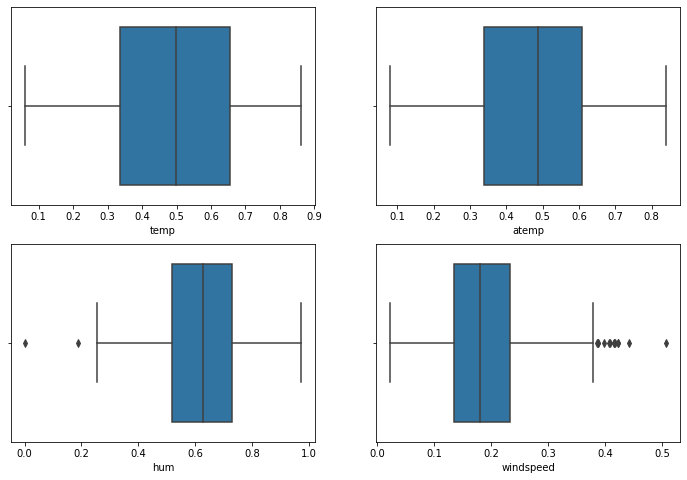

In [19]:
plt.figure(0, figsize=(12,8))

plt.subplot(221)
sns.boxplot(data["temp"])

plt.subplot(222)
sns.boxplot(data["atemp"])

plt.subplot(223)
sns.boxplot(data["hum"])

plt.subplot(224)
sns.boxplot(data["windspeed"])

In [20]:
continuous_col

['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

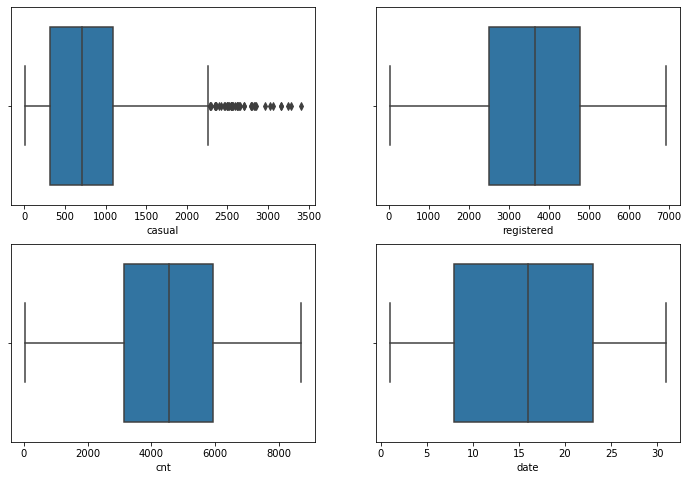

In [21]:
plt.figure(1, figsize=(12,8))

plt.subplot(221)
sns.boxplot(data["casual"])

plt.subplot(222)
sns.boxplot(data["registered"])

plt.subplot(223)
sns.boxplot(data["cnt"])


In [22]:
# # Storing column names with outliers in a variable
# outlier_col = ["hum", "windspeed", "casual"]
# outlier_col

In [23]:
# # Replacing outliers with Maximum and Minimum value

# for col in outlier_col:
#     q75, q25 = np.percentile(data.loc[:, col], [75,25])
#     iqr = q75 - q25
    
#     minimum = q25 - (iqr * 1.5)
#     maximum = q75 + (iqr * 1.5)
    
#     data.loc[data.loc[:, col] < minimum, col] = minimum
#     data.loc[data.loc[:, col] > maximum, col] = maximum

In [24]:
data.head(8)

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,date
0,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,1
1,2,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,2
2,3,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,3
3,4,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,4
4,5,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,5
5,6,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606,6
6,7,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510,7
7,8,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959,8


# EDA

In [25]:
# Categorical Variables vs Target variable
# Creating a user defined function
def relationship(a,b):
    df = data.groupby(a)[b].sum()
    df = df.reset_index()
    df[b] = df[b]*100/sum(data[b])
    df = df.sort_values(by=['cnt'])
    print(df)
    return df.plot.barh(x=a, y=b, figsize=(15,7))

  season        cnt
0      1  14.315030
3      4  25.560129
1      2  27.897921
2      3  32.226919


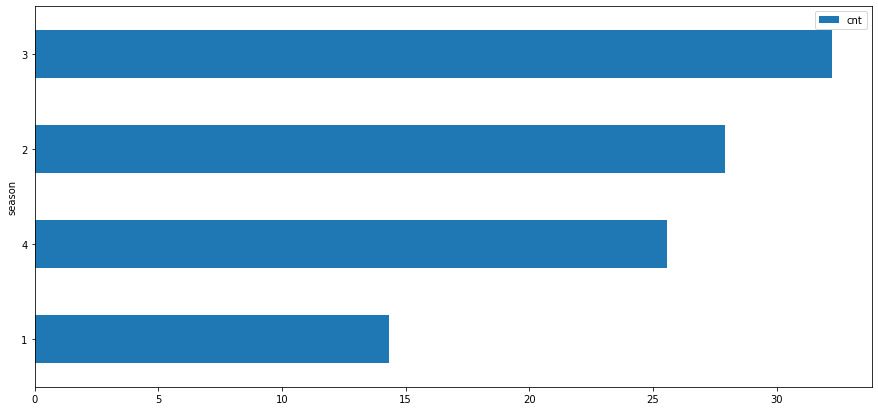

In [26]:
relationship("season", "cnt")

  yr        cnt
0  0  37.753544
1  1  62.246456


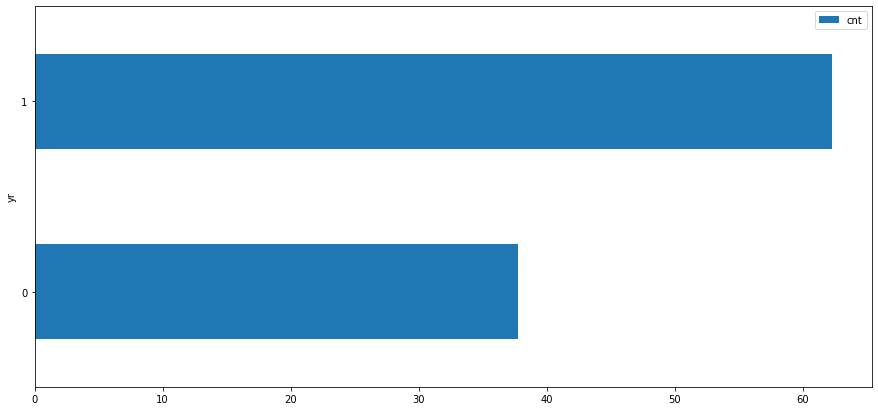

In [27]:
relationship("yr", "cnt")

   mnth        cnt
0     1   4.097970
1     2   4.596622
11   12   6.409249
2     3   6.952393
10   11   7.739321
3     4   8.172494
9    10   9.789961
4     5  10.073439
6     7  10.476211
8     9  10.507887
5     6  10.518547
7     8  10.665905


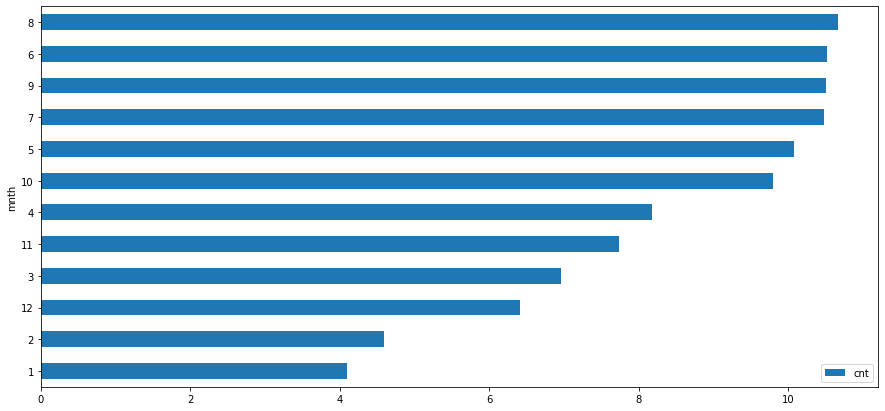

In [28]:
relationship("mnth", "cnt")

  holiday        cnt
1       1   2.382103
0       0  97.617897


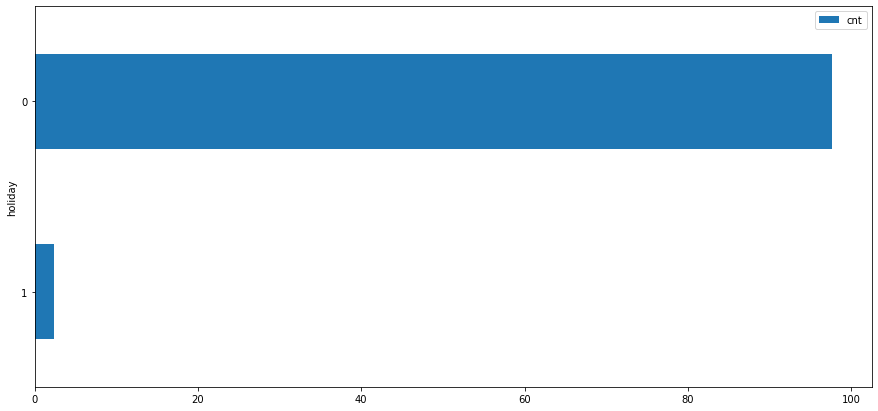

In [29]:
relationship("holiday", "cnt")

In [30]:
categorical_col

['season',
 'yr',
 'mnth',
 'date',
 'holiday',
 'weekday',
 'workingday',
 'weathersit']

  weekday        cnt
0       0  13.485281
1       1  13.833811
2       2  14.247031
3       3  14.366660
6       6  14.511193
4       4  14.741644
5       5  14.814381


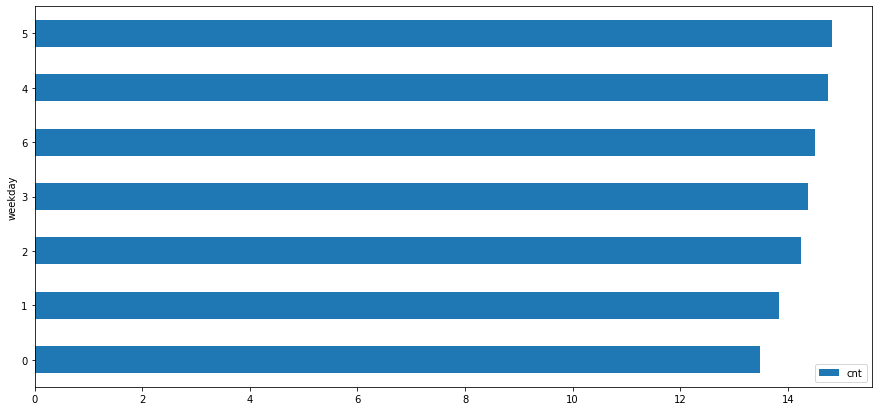

In [31]:
relationship("weekday", "cnt")

  workingday        cnt
0          0  30.378576
1          1  69.621424


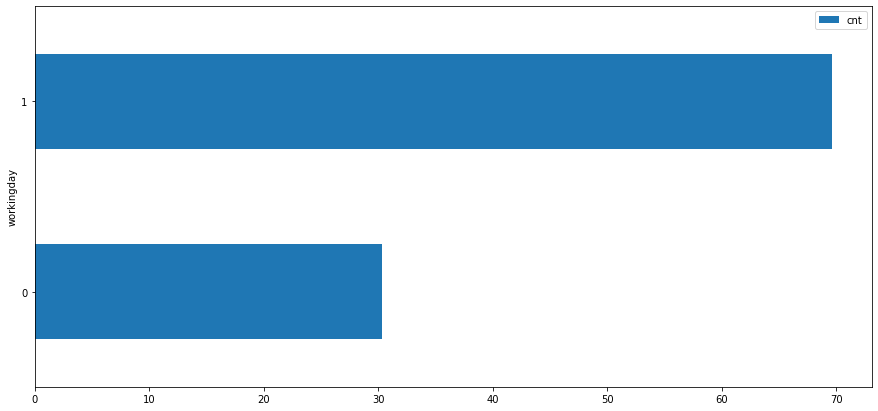

In [32]:
relationship("workingday", "cnt")

  weathersit        cnt
2          3   1.150097
1          2  30.274983
0          1  68.574920


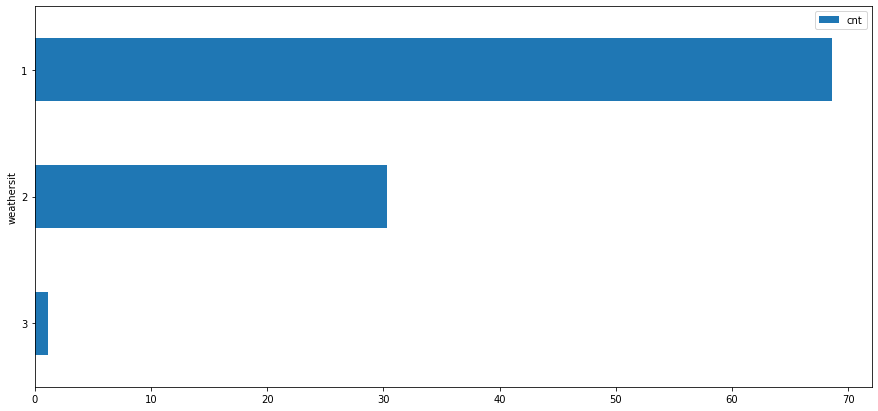

In [33]:
relationship("weathersit", "cnt")

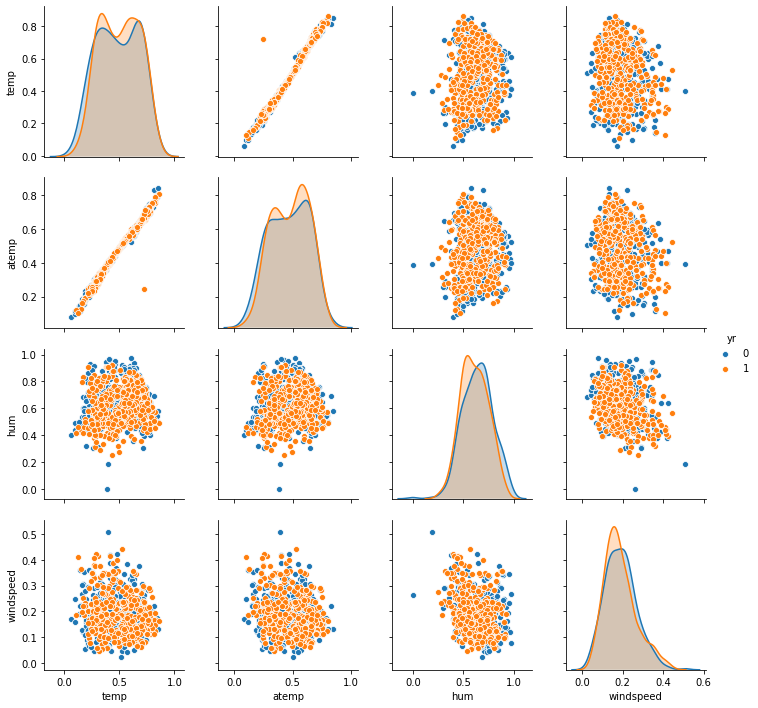

In [34]:
# Visualize the relationship among all continuous variables using pairplot
NumericFeatureList = ["temp", "atemp", "hum", "windspeed"]
sns.pairplot(data, hue = 'yr', vars = NumericFeatureList)

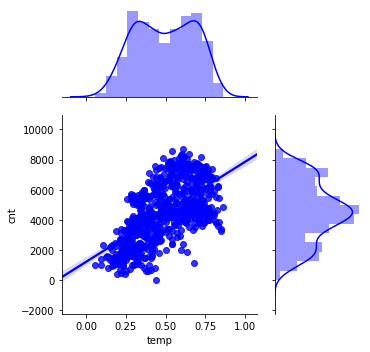

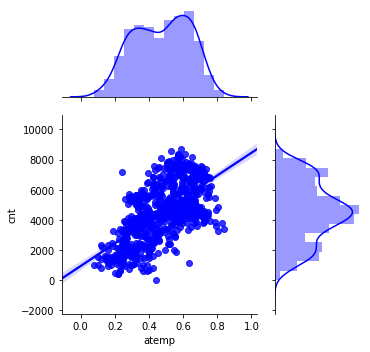

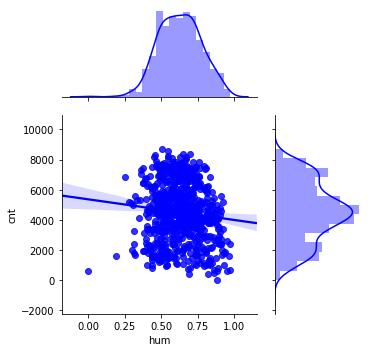

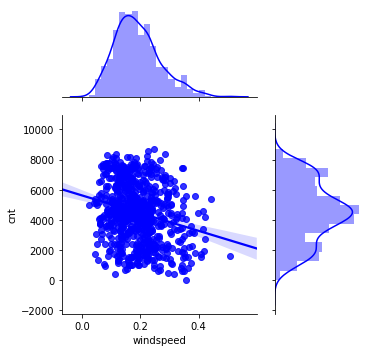

In [35]:
# Now Visualize relationship between independent continuous variable and dependent variable using Joint Plots
for i in NumericFeatureList:
    sns.jointplot(i, "cnt", data=data, kind='reg', color='b', 
                  size=5, ratio=2, space=0.2, dropna=True,
                  xlim =None, ylim=None, marginal_kws=None, annot_kws=None)

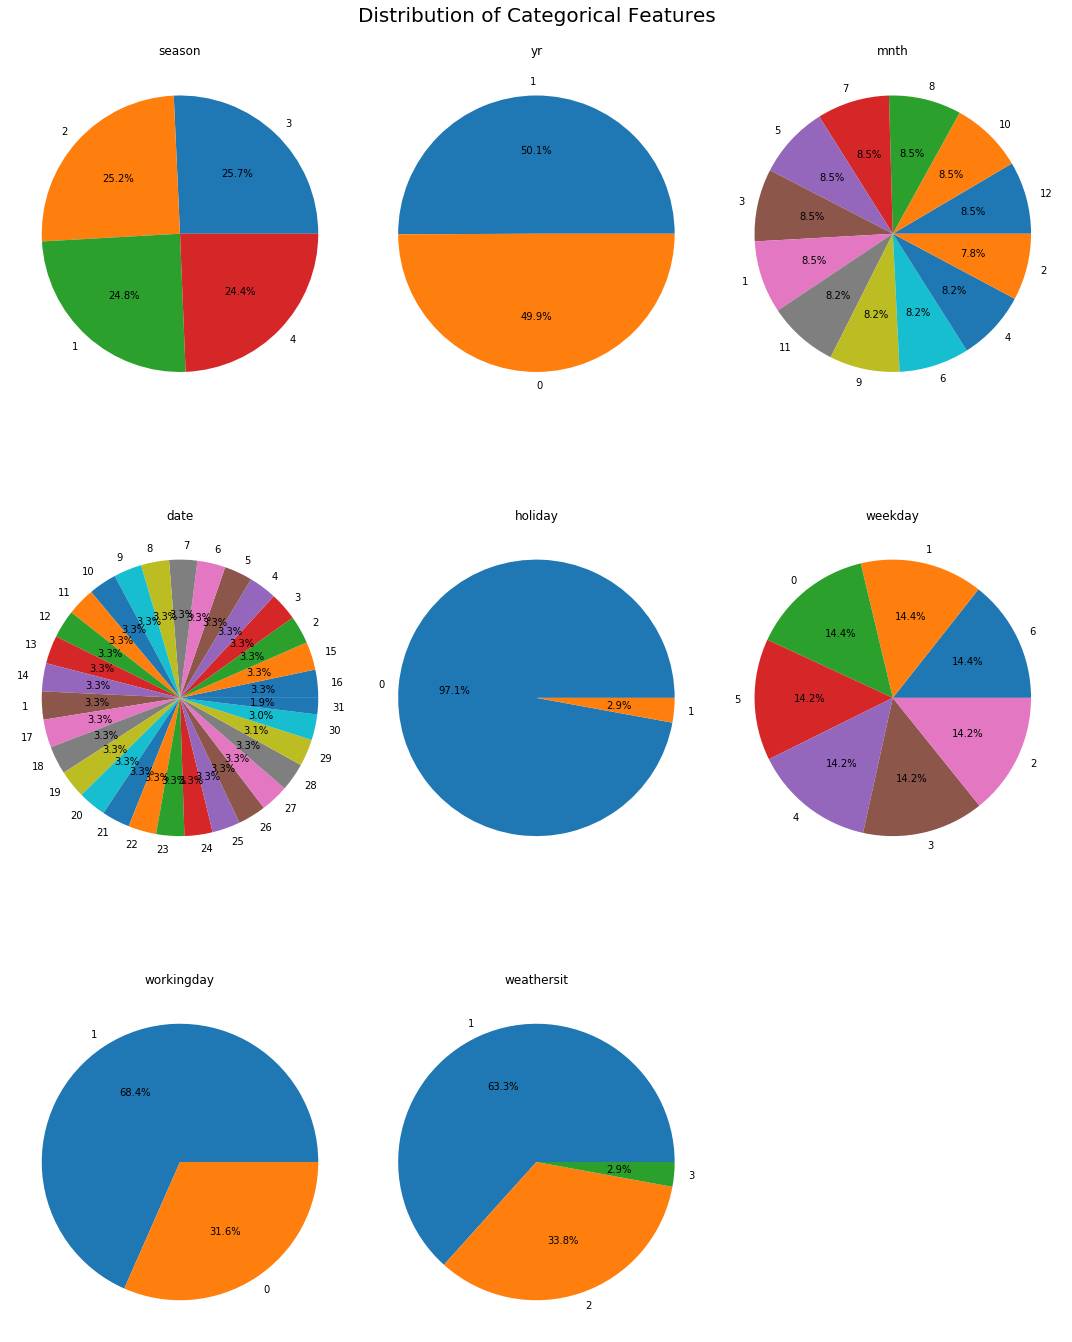

In [36]:
# Distribution of Categorical Variables with Pie chart
cat_data = data[categorical_col]
plt.figure(figsize=(15,20))
plt.suptitle('Distribution of Categorical Features', fontsize=20)
for i in range(1, cat_data.shape[1]+1):
    plt.subplot(3,3,i)
    f=plt.gca()
    f.set_title(cat_data.columns.values[i-1])
    values = cat_data.iloc[:,i-1].value_counts(normalize=True).values
    index=cat_data.iloc[:,i-1].value_counts(normalize=True).index
    plt.pie(values, labels=index, autopct='%1.1f%%')
    
plt.tight_layout()


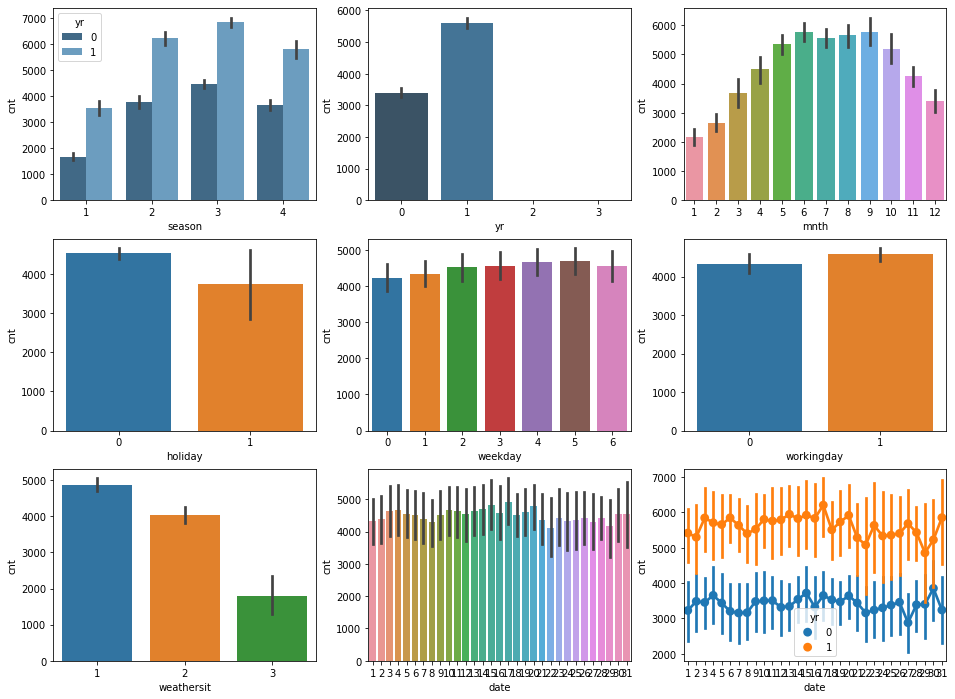

In [37]:
# Individual categorical features by count
fig, saxis = plt.subplots(3, 3,figsize=(16,12))

sns.barplot(x = 'season', y = 'cnt',hue= 'yr', data=data, ax = saxis[0,0], palette ="Blues_d")
sns.barplot(x = 'yr', y = 'cnt', order=[0,1,2,3], data=data, ax = saxis[0,1], palette ="Blues_d")
sns.barplot(x = 'mnth', y = 'cnt', data=data, ax = saxis[0,2])
sns.barplot(x = 'holiday', y = 'cnt',  data=data, ax = saxis[1,0])
sns.barplot(x = 'weekday', y = 'cnt',  data=data, ax = saxis[1,1])
sns.barplot(x = 'workingday', y = 'cnt', data=data, ax = saxis[1,2])
sns.barplot(x = 'weathersit', y = 'cnt', data=data, ax = saxis[2,0])
sns.barplot(x = 'date', y = 'cnt' , data=data, ax = saxis[2,1])
#sns.pointplot(x = 'weathersit', y = 'cnt', data=data, ax = saxis[2,0])
sns.pointplot(x='date', y='cnt', hue='yr', data=data, markers='o', linestyles='-', dodge=False, join=True,ax = saxis[2,2])
#sns.pointplot()

# Feature Selection

In [38]:
data.loc[:, continuous_col].corr()

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
atemp,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066
hum,0.126963,0.139988,1.000000,-0.248489,-0.077008,-0.091089,-0.100659
windspeed,-0.157944,-0.183643,-0.248489,1.000000,-0.167613,-0.217449,-0.234545
casual,0.543285,0.543864,-0.077008,-0.167613,1.000000,0.395282,0.672804
registered,0.540012,0.544192,-0.091089,-0.217449,0.395282,1.000000,0.945517
cnt,0.627494,0.631066,-0.100659,-0.234545,0.672804,0.945517,1.000000


[]

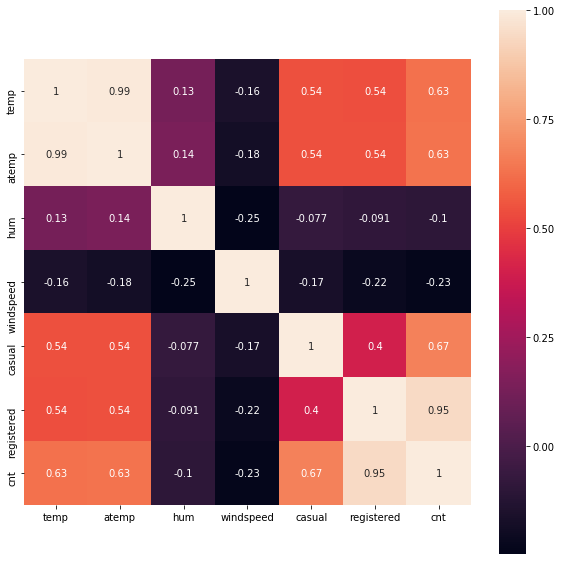

In [39]:
# Set the width and height of the plot
f, ax = plt.subplots(figsize=(10,10))

# Generate Correlation matrix
corr = data.loc[:, continuous_col].corr()

# Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), square=True, ax=ax, annot=True)

plt.plot()

In [40]:
categorical_col

['season',
 'yr',
 'mnth',
 'date',
 'holiday',
 'weekday',
 'workingday',
 'weathersit']

In [41]:
# Anova Test
formula = 'cnt~season+yr+mnth+holiday+weekday+workingday+weathersit'
anova_model = ols(formula, data=data).fit()
anova_table = anova_lm(anova_model, type=2)
print(anova_table)

               df        sum_sq       mean_sq            F         PR(>F)
season        3.0  9.505959e+08  3.168653e+08   436.233994  2.986008e-160
yr            1.0  8.840083e+08  8.840083e+08  1217.029660  9.065230e-156
mnth         11.0  1.873116e+08  1.702833e+07    23.443199   2.941086e-41
holiday       1.0  3.306975e+06  3.306975e+06     4.552770   3.320958e-02
weekday       6.0  1.583906e+07  2.639843e+06     3.634319   1.468641e-03
workingday    1.0  1.918815e+04  1.918815e+04     0.026417   8.709334e-01
weathersit    2.0  1.856523e+08  9.282614e+07   127.795373   4.290346e-48
Residual    706.0  5.128140e+08  7.263654e+05          NaN            NaN


In [42]:
print(continuous_col)
print(continuous_col_wo_target)
print(categorical_col)

['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered']
['season', 'yr', 'mnth', 'date', 'holiday', 'weekday', 'workingday', 'weathersit']


In [43]:
data_fsel = data.drop(columns=["atemp", "casual", "hum", "registered"])
data_fsel.columns

Index(['instant', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'windspeed', 'cnt', 'date'],
      dtype='object')

In [44]:
for i in ["atemp", "casual", "hum", "registered"]:
    continuous_col.remove(i)
    continuous_col_wo_target.remove(i)

In [45]:
continuous_col

['temp', 'windspeed', 'cnt']

# Feature Scaling

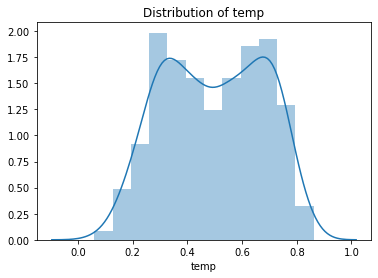

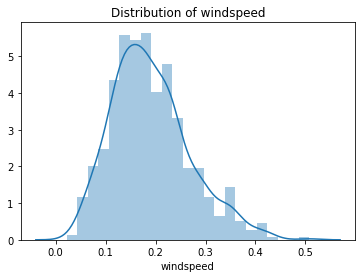

In [46]:
# Checking Distribution of the data

for col in continuous_col_wo_target:
    sns.distplot(data_fsel[col], bins='auto')
    plt.title("Distribution of {}".format(str(col)))
    plt.show()

# Model Building

In [47]:
data_fsel.columns

Index(['instant', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'windspeed', 'cnt', 'date'],
      dtype='object')

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
season        731 non-null category
yr            731 non-null category
mnth          731 non-null category
holiday       731 non-null category
weekday       731 non-null category
workingday    731 non-null category
weathersit    731 non-null category
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
date          731 non-null category
dtypes: category(8), float64(4), int64(4)
memory usage: 54.4 KB


In [49]:
# features = data_fsel.iloc[:, data_fsel.columns != 'cnt']
# target = data_fsel['cnt']

In [50]:
# x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state = 9)

In [51]:
# Importing train and test data used in R so as to use the same train and test data in both R and Python
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [52]:
y_train = train['cnt'].copy()
y_test = test['cnt'].copy()

x_train = train.drop(columns="cnt")
x_test = test.drop(columns="cnt")

In [53]:
# Creating function that returns the evaluation metrics
def metrics(t, p):
    mae = mean_absolute_error(t,p)
    #mse = ((t-p)**2).mean()
    mse = mean_squared_error(t,p)
    rmse = np.sqrt(mse)
    rsqr = r2_score(t,p)
    
    print('RMSE      :',rmse)
    print('MSE       :',mse)
    print('MAE       :',mae)
    print('R²        :',rsqr)    

## Linear Regression

In [54]:
# Linear Regression
lin_reg_model = LinearRegression().fit(x_train, y_train)
lin_reg_predict = lin_reg_model.predict(x_test)
metrics(y_test, lin_reg_predict)

RMSE      : 939.7447126560853
MSE       : 883120.1249650683
MAE       : 702.111822726758
R²        : 0.747306818134555


## Decision Tree

In [55]:
# Decision Tree
dt_model = DecisionTreeRegressor().fit(x_train, y_train)
dt_predict = dt_model.predict(x_test)
metrics(y_test, dt_predict)

RMSE      : 1085.8167496814963
MSE       : 1178998.013888889
MAE       : 739.2777777777778
R²        : 0.6626452606836382


## Random Forest

In [58]:
# Random Forest
rf_model = RandomForestRegressor(n_estimators=500).fit(x_train, y_train)
rf_predict = rf_model.predict(x_test)
metrics(y_test, rf_predict)

RMSE      : 667.0348391579083
MSE       : 444935.4766504166
MAE       : 470.46901388888887
R²        : 0.8726875788001554


# Gradient Boosting algorithm

In [59]:
gb_model = GradientBoostingRegressor(loss='ls', learning_rate=0.1,
                                     n_estimators=300, subsample=1.0,
                                     criterion='friedman_mse',
                                     min_samples_split=2, 
                                     min_samples_leaf=1, 
                                     min_weight_fraction_leaf=0.0, 
                                     max_depth=3, 
                                     min_impurity_decrease=0.0, 
                                     min_impurity_split=None,
                                     init=None, random_state=1,
                                     max_features=None, alpha=0.9,
                                     verbose=0, max_leaf_nodes=100,
                                     warm_start=False, presort='auto')
gb_model.fit(x_train, y_train)
gb_predict = gb_model.predict(x_test)
metrics(y_test, gb_predict)

RMSE      : 655.9114465781079
MSE       : 430219.8257521861
MAE       : 465.4918722627291
R²        : 0.8768982683129123


In [60]:
def model_eval_metric(model,X_test,Y_test,Y_predict):
    r_squared = model.score(X_test, Y_test)
    mse = mean_squared_error(Y_predict, Y_test)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(Y_predict, Y_test)
    return r_squared,mse,rmse, mae

In [61]:
eval_metric=[]
ml_algo=['Linear Regression','Decision Tree','Random Forest','Gradient Boosting']
ml_models= [lin_reg_model,dt_model,rf_model,gb_model]
predictions =[lin_reg_predict,dt_predict,rf_predict,gb_predict]
i=0
for mod in ml_algo:
    R_SQR,MSE,RMSE,MAE = model_eval_metric(ml_models[i],x_test,y_test,predictions[i])
    eval_metric.append([mod,R_SQR,MSE,RMSE,MAE])
    i=i+1
model_performance=pd.DataFrame(eval_metric,columns =['Model','R-Squared','MeanSquaredError','RootMeanSquaredError',
                                                     'MeanAbsoluteError'])

In [62]:
model_performance

,Model,R-Squared,MeanSquaredError,RootMeanSquaredError,MeanAbsoluteError
0,Linear Regression,0.747307,8.831201e+05,939.744713,702.111823
1,Decision Tree,0.662645,1.178998e+06,1085.816750,739.277778
2,Random Forest,0.872688,4.449355e+05,667.034839,470.469014
3,Gradient Boosting,0.876898,4.302198e+05,655.911447,465.491872


#### - Gradient Boosting has least values in RMSE, MSE, MAE and R-Squared, Therefore i will choose Gradient Boosting Model

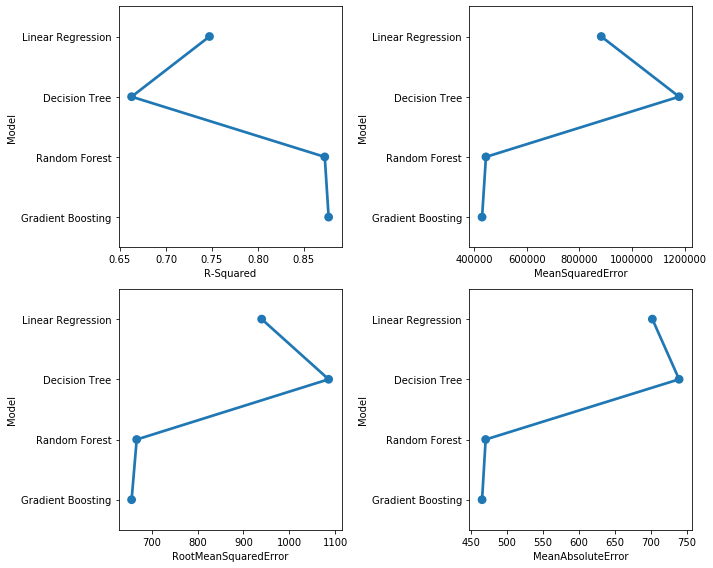

In [75]:
# Plotting Model performance in each Metrics
fig, saxis = plt.subplots(2, 2,figsize=(10,8))
a=sns.pointplot(y='Model', x='R-Squared', rotate =90,data=model_performance, markers='o', linestyles='-', dodge=False,
                join=True,ax = saxis[0,0])
sns.pointplot(y='Model', x='MeanSquaredError', data=model_performance, markers='o', linestyles='-', dodge=False,
              join=True,ax = saxis[0,1])
sns.pointplot(y='Model', x='RootMeanSquaredError', data=model_performance, markers='o', linestyles='-', dodge=False,
              join=True,ax = saxis[1,0])
sns.pointplot(y='Model', x='MeanAbsoluteError', data=model_performance, markers='o', linestyles='-', dodge=False,
              join=True,ax = saxis[1,1])
plt.tight_layout()

In [84]:
data_predicted = x_test
data_predicted["Actual Count"] = y_test
data_predicted["Predicted Count"] = gb_predict
data_predicted["Predicted Count"] = round(data_predicted["Predicted Count"])
data_predicted.to_csv("data_output.csv")
data_predicted.head(10)

,season,yr,mnth,date,holiday,weekday,workingday,weathersit,temp,windspeed,Actual Count,Predicted Count
0,1,0,1,1,0,6,0,2,0.344167,0.160446,985,1234.0
1,1,0,1,5,0,3,1,1,0.226957,0.186900,1600,1777.0
2,1,0,1,12,0,3,1,1,0.172727,0.304627,1162,1105.0
3,1,0,1,13,0,4,1,1,0.165000,0.301000,1406,1421.0
4,1,0,1,18,0,2,1,2,0.216667,0.146775,683,1472.0
5,1,0,1,31,0,1,1,2,0.180833,0.187192,1501,956.0
6,1,0,2,2,0,3,1,2,0.260000,0.264308,1526,1506.0
7,1,0,2,6,0,0,0,1,0.285833,0.141800,1623,1898.0
8,1,0,2,8,0,2,1,1,0.220833,0.361950,1530,1481.0
9,1,0,2,13,0,0,0,1,0.316522,0.260883,1589,1837.0


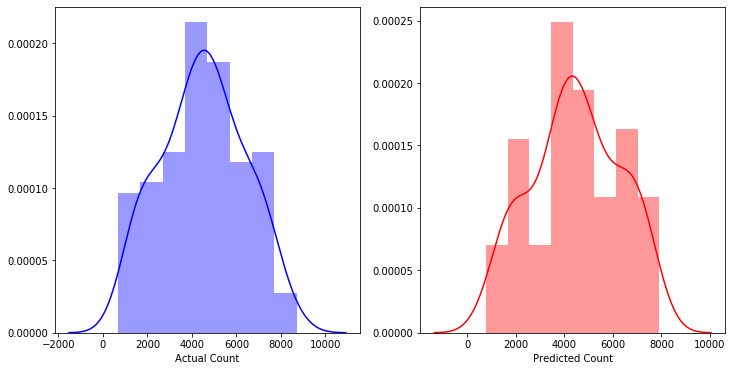

In [83]:
#-----Plotting the distributions of 'ActualCount' and 'PredictedCount'
fig, saxis = plt.subplots(ncols=2 ,figsize=(12,6))
sns.distplot(data_predicted["Actual Count"],color ='b', ax = saxis[0])
sns.distplot(data_predicted["Predicted Count"],color ='r', ax = saxis[1])


In [66]:
data_wo_av = data_predicted.drop(columns="Actual Count")
data_wo_av.columns

Index(['season', 'yr', 'mnth', 'date', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'windspeed', 'Predicted Count'],
      dtype='object')

In [67]:
idx_prev = range(0,587)
len(idx_prev)
previous = pd.DataFrame(y_train, index = idx_prev)

In [68]:
len(y_train)

587

In [70]:
idx_pred = range(587,731)
len(idx_pred)
predicted = pd.DataFrame(gb_predict, index = idx_pred)
predicted.columns = ['cnt']

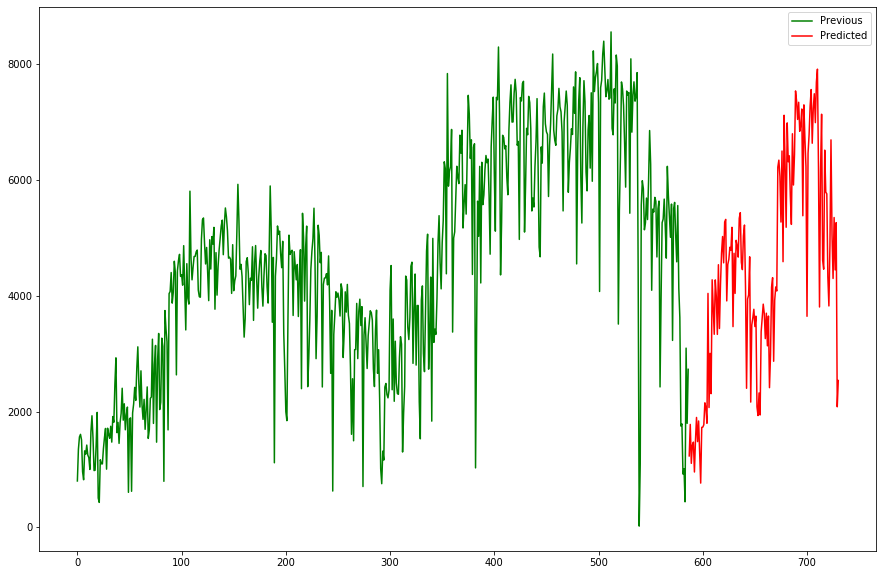

In [71]:
plt.figure(figsize=(15,10))
plt.plot(previous, color="green", label = "Previous")
plt.plot(predicted, color='red', label = "Predicted")
plt.legend()



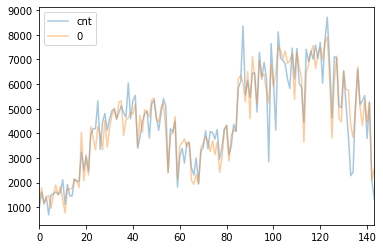

In [74]:

df_all = pd.merge(pd.DataFrame(y_test), pd.DataFrame(gb_predict), how = 'inner', left_index=True, right_index = True)
df_all.plot(alpha = 0.4)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1])

